<a href="https://colab.research.google.com/github/kavyashree-205/SCORE-PREDICTION/blob/main/SCORE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE GIVEN PROBLEM IS TO PREDICT THE PERCENTAGE OF MARKS OF AN STUDENT BASED ON THE NUMBE ROF STUDY HOURS**
The problem given is to caluculate the percentage of marks when studied for 9.25hrs.This problem can be solved by using Linear Regression with one independent variable(HOURS) and a dependent variable(SCORES).

# **IMPORTING LIBRARIES FOR SUPERVISED MACHINE LEARNING**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import urllib.request

In [3]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [4]:
urllib.request.urlretrieve(url)

('/tmp/tmp77d9hk1a', <http.client.HTTPMessage at 0x7f90206ffeb8>)

# **LOADING THE GIVEN DATASET**

In [5]:
df=pd.read_csv(url)

# **UNDERSTANDING THE DATA**
- UNDERSTAND THE MEANING OF THE FIELD NAMES
- KNOW THE 5 SUMMARY VALUES OF THE ATTRIBUTES
- KNOW THE DATATYPE OF EACH COLUMN
- KNOW THE SHAPE OF THE DATASET

# **MEANING OF ATTRIBUTES**
HOURS -- The number of hours spent on studying.

SCORES -- The score obtained with respect to hours studied.

In [6]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
print("THE SHAPE OF THE DATATSET IS :",df.shape)

THE SHAPE OF THE DATATSET IS : (25, 2)


# **DENSITY PLOT**
The densioty plot is similar to histogram which helps to know to distribution of attributes in the dataset.
It displays the shape and spread of continues data

(SINCE THIS IS A SMALL DATASET YOU CAN SKIP THIS STEP)

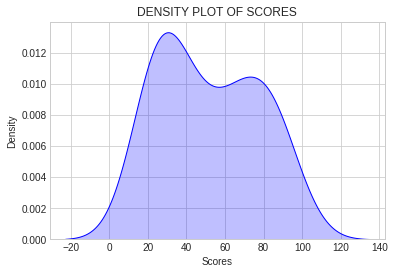

In [18]:
#plotting density plot
figure0=plt.figure()
plt.style.use("seaborn-whitegrid")
sns.kdeplot(data=df,x='Scores',shade=True,color="blue")
plt.title("DENSITY PLOT OF SCORES")
plt.show()

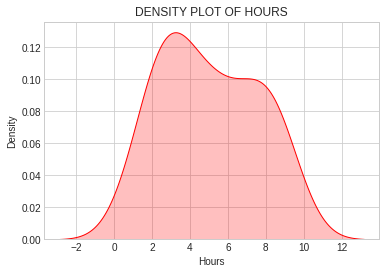

In [19]:
#plotting density plot
figure1=plt.figure()
plt.style.use("seaborn-whitegrid")
sns.kdeplot(data=df,x='Hours',shade=True,color="RED")
plt.title("DENSITY PLOT OF HOURS")
plt.show()

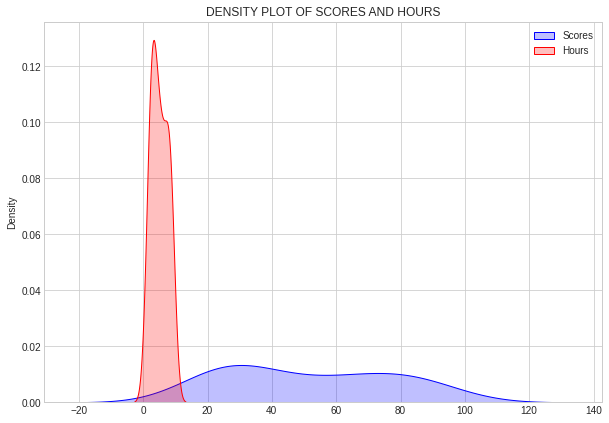

In [26]:
figure2=plt.figure(figsize=(10,7))
sns.kdeplot(df['Scores'],color="blue",shade=True)
sns.kdeplot(df['Hours'],color="red",shade=True)
plt.title("DENSITY PLOT OF SCORES AND HOURS")
plt.xlabel('')
plt.legend(['Scores','Hours'])
plt.show()

# **LINEAR REGRESSION :**
Linear regression in simple terms is fitting all the values of the dataset with least residual value into a function which is linear in nature y=ax+b.

# **RESIDUAL:**
Residual is the difference between actual value and the predicted value.

# **NOTE:**
The sum of the residuals is always equal to zero.

 **SINCE THE CORRELATION IS GREATER THAN 0.5 HENCE WE CAN PROCEED FOR LINEAR REGRESSION MODEL**

# **HEAT MAP**

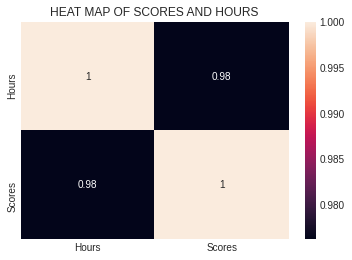

In [36]:
#relationship analysis
figure_3=df.corr()
sns.heatmap(figure_3,annot=True)
plt.title("HEAT MAP OF SCORES AND HOURS")
plt.show()

# **PAIR PLOT**

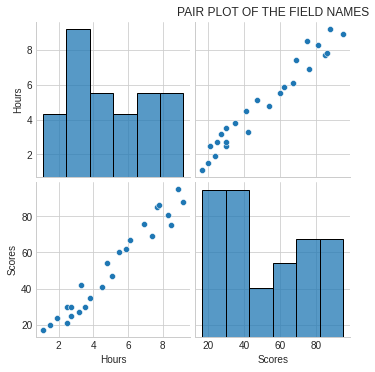

In [38]:
sns.pairplot(df)
plt.title("PAIR PLOT OF THE FIELD NAMES")
plt.show()

# **SCATTER PLOT:**
**Scatter plot gives the relationship between two numeric variables,hence we can conclude wheter the two variables are strongly correlated or weakly correlated.**

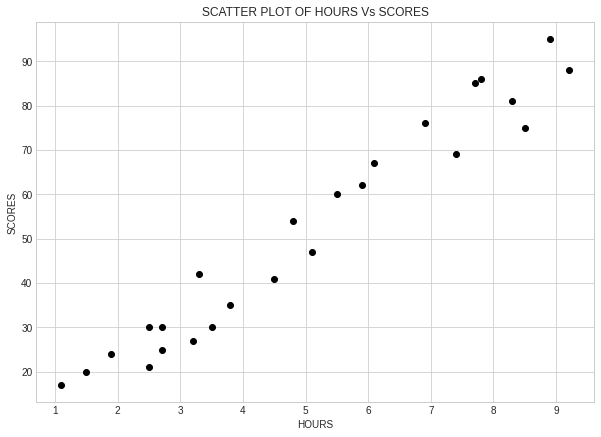

In [39]:
#scatter plot of hours vs scores
figure_4=plt.figure(figsize=(10,7))
plt.style.use("seaborn-whitegrid")
plt.scatter(x=df['Hours'],y=df['Scores'],color="black")
plt.title("SCATTER PLOT OF HOURS Vs SCORES")
plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.show()

# **LINEAR REGRESSION MODEL:**
# **STEP 1:**
#**Split the dataset into test and train set**.
#**Here we conside 80% of the data to be train set and 20% of the data as test set**

In [40]:
#splitting the data into test and train sets
X=df.iloc[:,0].values
Y=df.iloc[:,-1].values
X=X.reshape(-1,1)
print("THE INPUT(INDEPENDENT VARIABLE):",X)
print("THE OUTPUT(DEPENDENT VARIABLE OR TARGET VARIABLE):",Y)

THE INPUT(INDEPENDENT VARIABLE): [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
THE OUTPUT(DEPENDENT VARIABLE OR TARGET VARIABLE): [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]



# **STEP 2:**
# **Train the model.**

In [41]:
#TRAINING MODEL
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# **STEP 3:**
# **Perform linear regression**

In [42]:
#train our model
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **STEP 4:**
# **Construct a scatter plot with regression line**

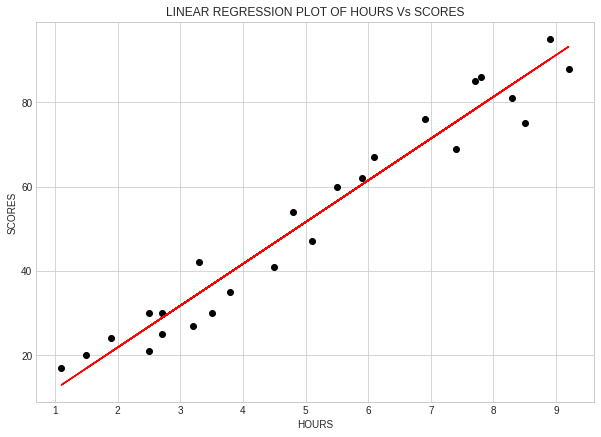

In [48]:
#to draw to regression line
figure5=plt.figure(figsize=(10,7))
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,Y,color="black")
plt.plot(X,line,color="red")
plt.title("LINEAR REGRESSION PLOT OF HOURS Vs SCORES")
plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.show()

# **STEP 5**
# **PREDICT THE VALUE:**
**The problem is to find the score when the number of hours spent on studying is 9.25hrs**

In [61]:
x=[[9.25]]
own_predict=regressor.predict(x)
print("A STUDENT WHO STUDIED FOR {} HOURS MAY GET A SCORE OF {}".format(x[0][0],round(own_predict[0],2)))

A STUDENT WHO STUDIED FOR 9.25 HOURS MAY GET A SCORE OF 93.69


# **STEP 6:**
# **EVALUATING THE MODEL**
**Calculating mean absolute error**

**Calculating mean squared error**

**Calculating root mean squared error**

In [62]:
df3=pd.DataFrame({"ACTUAL VALUE":y_test,"PREDICTED_VALUE":predicted_values})
print(df3)

   ACTUAL VALUE  PREDICTED_VALUE
0            20        16.884145
1            27        33.732261
2            69        75.357018
3            30        26.794801
4            62        60.491033


In [63]:
from sklearn import metrics
abe=metrics.mean_absolute_error(df3['ACTUAL VALUE'],df3['PREDICTED_VALUE'])
mse=metrics.mean_squared_error(df3['ACTUAL VALUE'],df3['PREDICTED_VALUE'])
rms=metrics.r2_score(df3['ACTUAL VALUE'],df3['PREDICTED_VALUE'])
print("THE MEAN ABSOLUTE ERROR : ",round(abe,3))
print('THE MEAN SQUARED ERROR : ',round(mse,3))
print('THE ROOT MEAN SQUARED ERROR : ',round(rms,3))

THE MEAN ABSOLUTE ERROR :  4.184
THE MEAN SQUARED ERROR :  21.599
THE ROOT MEAN SQUARED ERROR :  0.945


# **task 2 completed**